# Students Performance Indicator

## 1. Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2. Data Collection

Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("StudentsPerformance.csv")

In [6]:
df.shape

(1000, 8)

We have 1000 Property with 8 Features.

In [7]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


## 3. Dataset information

1000 observations and 8 Features.

Features:
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score (0-100)
- reading score (0-100)
- writing score (0-100)

## 4. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the unique values of each column (numbers and values of categorical columns)
- Check statistics of data set
- Check Outliers

### 4.1 Check missing values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values.

### 4.2 Check for duplicates

In [10]:
sum(df.duplicated())

0

No duplicates.

### 4.3 Check data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Correct data types.

### 4.4 Check unique values of Categorical Features

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [29]:
for feature in categorical_features:
    print(feature + ":", end=" ")
    print(df[feature].unique())

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


### 4.5 Check descriptive statistics

In [28]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 4.6 Outliers

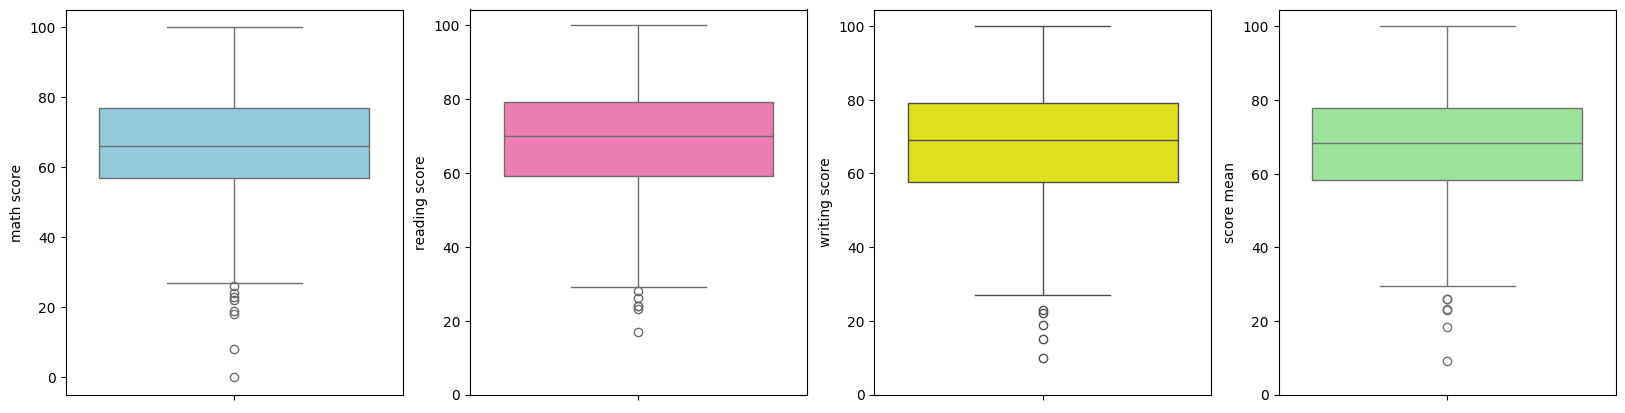

In [236]:
plt.subplots(1,4,figsize=(20,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink').set_ylim(bottom=0)
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow').set_ylim(bottom=0)
plt.subplot(144)
sns.boxplot(df['score mean'],color='lightgreen').set_ylim(bottom=0)
plt.show()

## 5. Feature Engineering

In [31]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['score mean'] = df['total score'] / 3

## 6. Exploratory Data Visualization

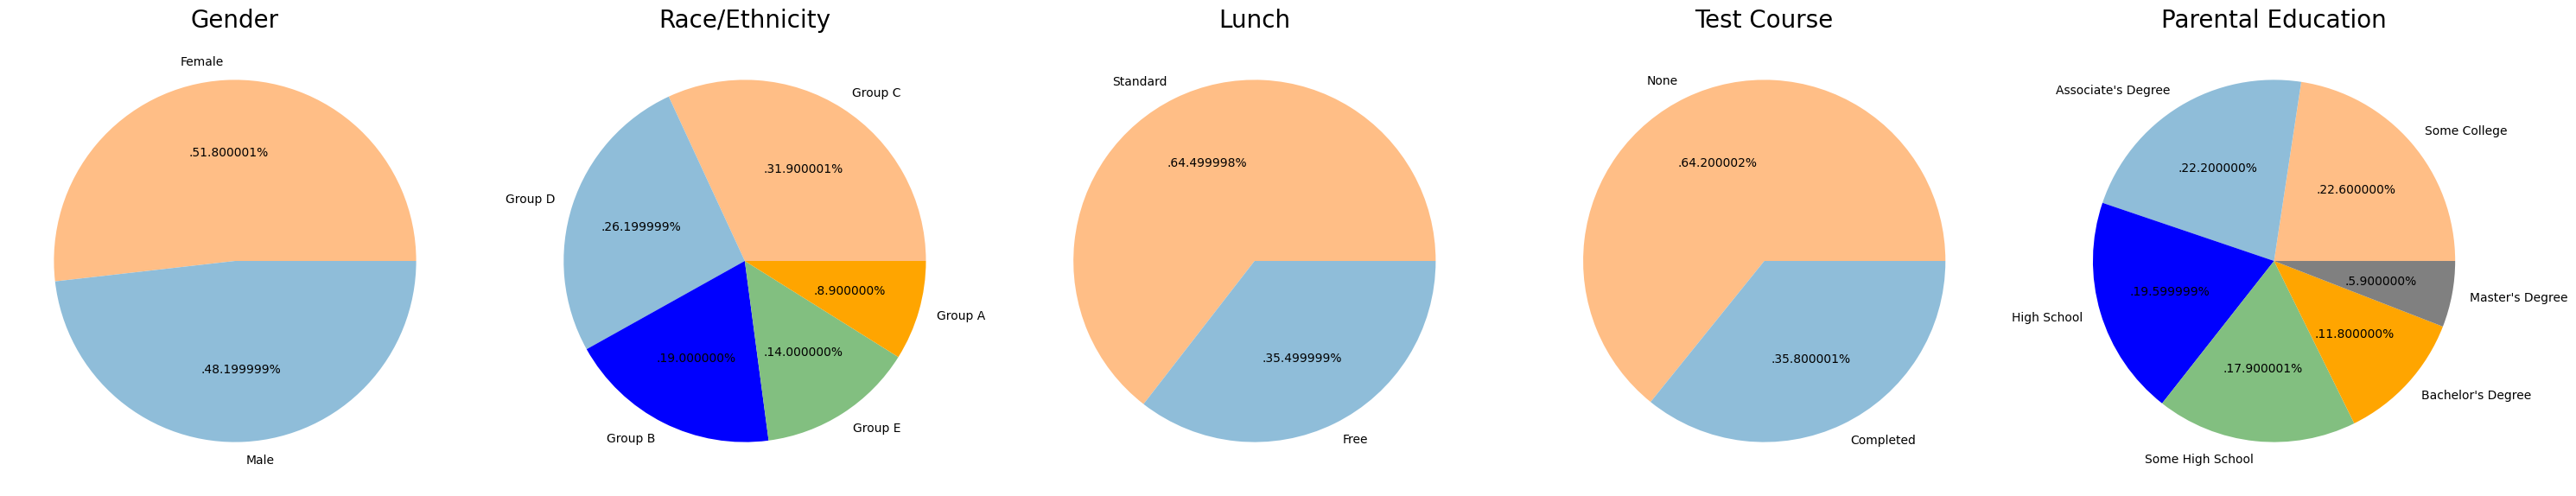

In [185]:
plt.rcParams['figure.figsize'] = (30, 25)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['#FFBE86','#8FBDD9']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['#FFBE86','#8FBDD9', 'blue', '#82BF80','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['#FFBE86','#8FBDD9']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['#FFBE86','#8FBDD9']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['#FFBE86','#8FBDD9', 'blue', '#82BF80','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### 6.1 Gender:

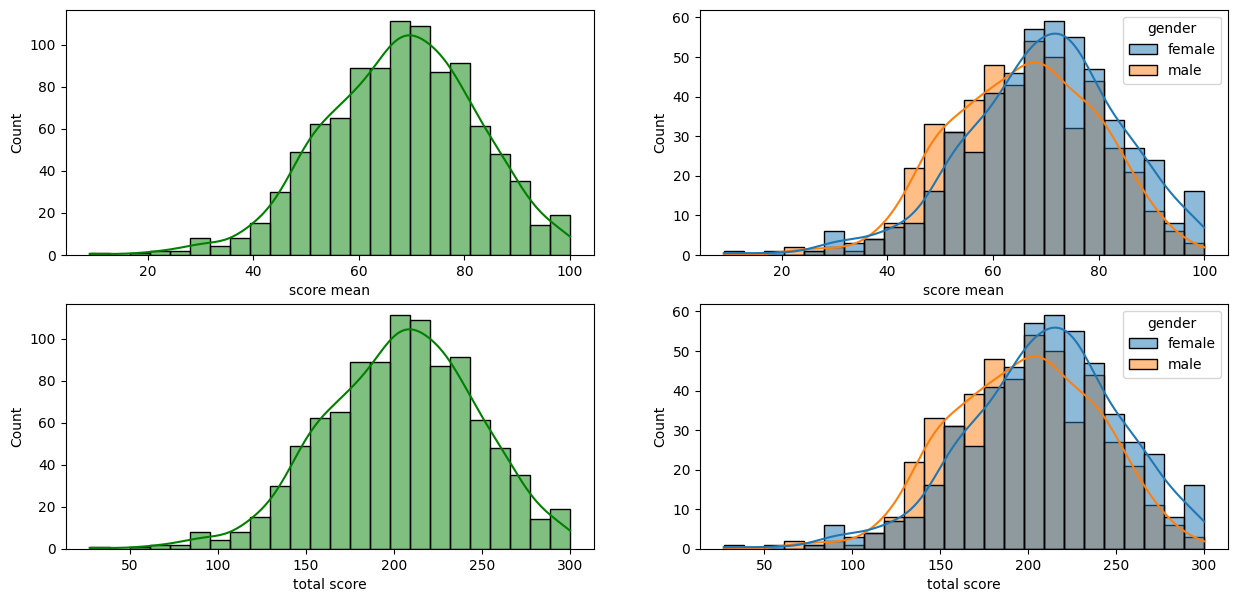

In [231]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
plt.subplot(221)
sns.histplot(data=df,x='score mean',kde=True,color='g')
plt.subplot(222)
sns.histplot(data=df,x='score mean',kde=True,hue='gender')

plt.subplot(223)
sns.histplot(data=df,x='total score',kde=True,color='g')
plt.subplot(224)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

In this data, female outperform males in test scores.

### 6.2 Race/Ethnicity:

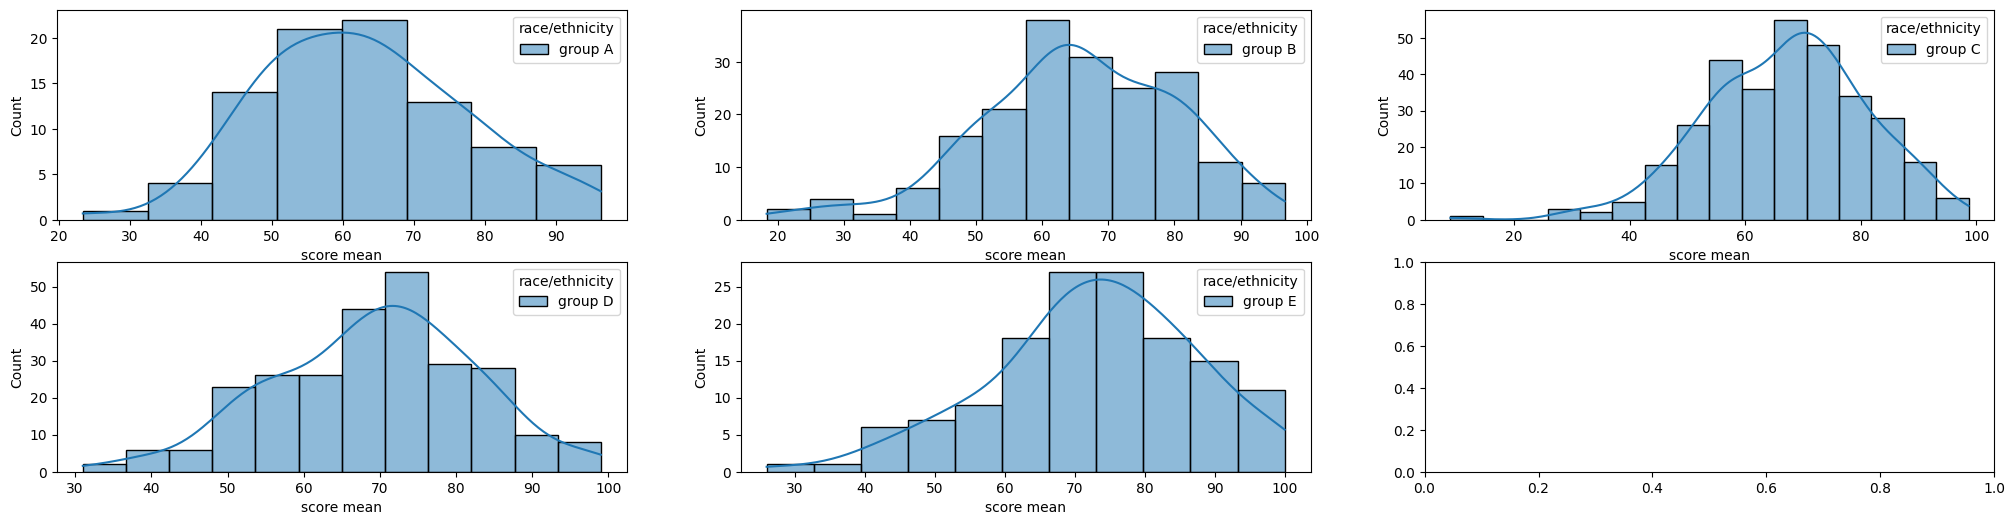

In [162]:
race_ethnicity = ['group A', 'group B', 'group C', 'group D', 'group E']

plt.subplots(2,3,figsize=(25,6))

for i, race in zip(range(5), race_ethnicity):
    plt.subplot(231+i)
    sns.histplot(data=df[df['race/ethnicity'] == race], x='score mean', kde=True,hue='race/ethnicity')

In [171]:
race_ethnicity = ['group A', 'group B', 'group C', 'group D', 'group E']
for race in race_ethnicity:
    print(race)
    print(df[df['race/ethnicity']==race].describe())
    print('-' * 80)

group A
       math score  reading score  writing score  total score  score mean
count   89.000000      89.000000      89.000000    89.000000   89.000000
mean    61.629213      64.674157      62.674157   188.977528   62.992509
std     14.523008      15.543762      15.468278    43.333794   14.444598
min     28.000000      23.000000      19.000000    70.000000   23.333333
25%     51.000000      53.000000      51.000000   156.000000   52.000000
50%     61.000000      64.000000      62.000000   184.000000   61.333333
75%     71.000000      74.000000      73.000000   219.000000   73.000000
max    100.000000     100.000000      97.000000   289.000000   96.333333
--------------------------------------------------------------------------------
group B
       math score  reading score  writing score  total score  score mean
count  190.000000     190.000000     190.000000   190.000000  190.000000
mean    63.452632      67.352632      65.600000   196.405263   65.468421
std     15.468191      15.1

After viewing the data distribution and statistics I concluded that:
- Group E and D do have the highest test scores with median of 73.5 and 70.0 respectively. (Relied on visualization and median not the mean as outliers have impact on the data)
- Group E is the only group with average score of 100.0 among all groups.
- Group C with a median of 68.3 comes next in test scores after group E and D respectively, followed by group B with a median of 65.0.
- Group A distribution is the lowest performing group with a median of 61.3.

### 6.3 Parental Level of Education:

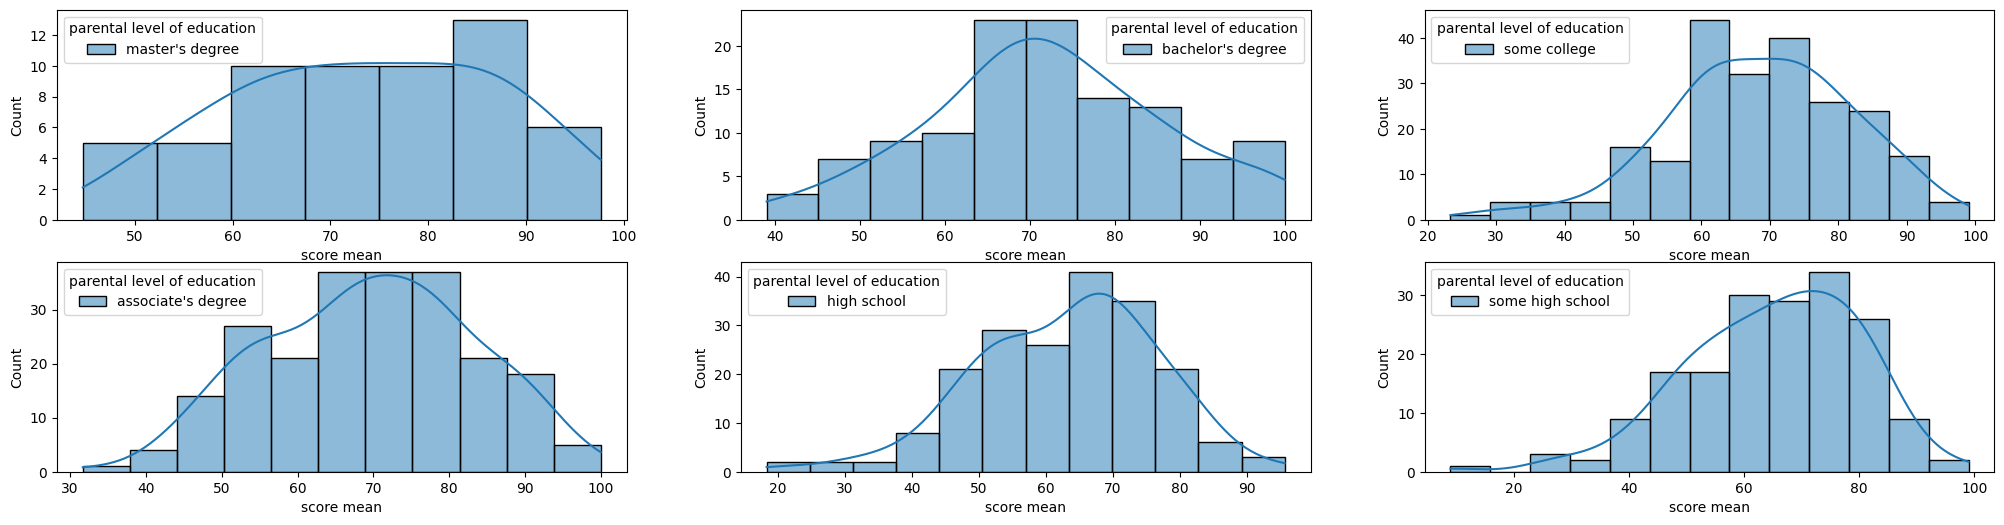

In [163]:
education_level = ["master's degree", "bachelor's degree", 'some college', "associate's degree",'high school', 'some high school']

plt.subplots(2,3,figsize=(25,6))

for i, level in zip(range(7), education_level):
    plt.subplot(231+i)
    sns.histplot(data=df[df['parental level of education'] == level],x='score mean',kde=True,hue='parental level of education')

The data distribution shows that:
- Students with average scores less than 30 are only seen in parents with level of education from some college to less (high school, some high school). 
- Students with parental level of master's degree tend to have higher average scores than the other levels.

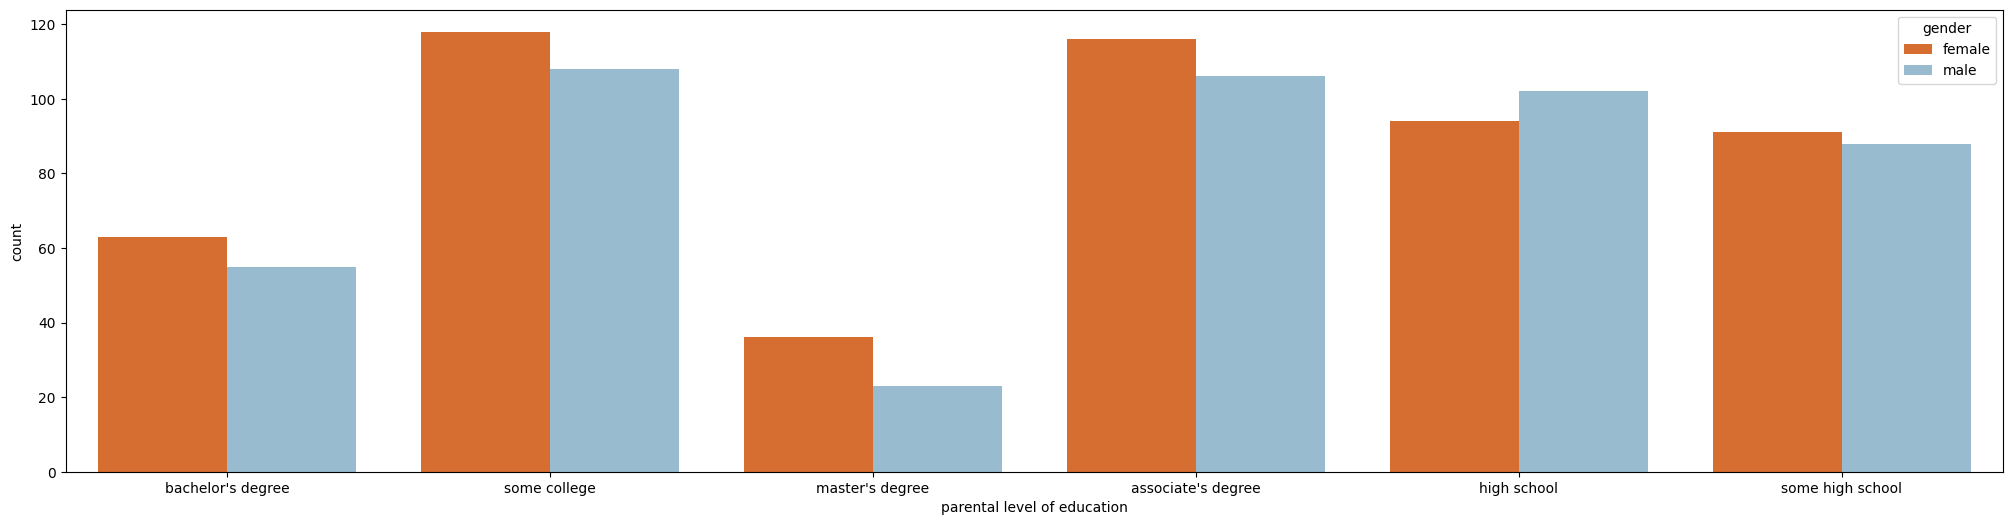

In [109]:
plt.subplots(1,1,figsize=(25,6))
sns.countplot(x='parental level of education',hue='gender',data=df, palette=['#F26716','#8FBDD9'])
plt.show()

This visualisation shows that females number with parental level of education above some college are greater than the number of males and this may explain why females has higher average scores than males given this correlation. 

### 6.4 Lunch:

<Axes: xlabel='score mean', ylabel='Count'>

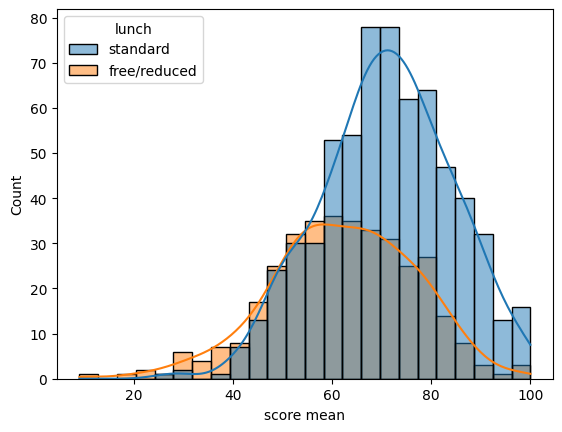

In [77]:
sns.histplot(data=df,x='score mean',kde=True,hue='lunch')

Students with standard lunch have higher scores than students with free/reduced lunch.

### 6.5 Test Preparation Course:

<Axes: xlabel='score mean', ylabel='Count'>

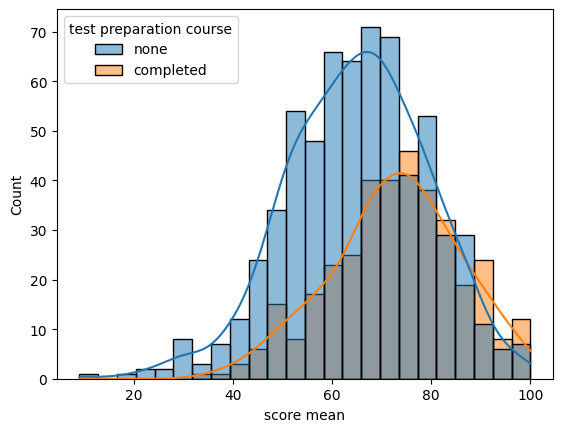

In [173]:
sns.histplot(data=df, x='score mean', kde=True,hue='test preparation course')

In [249]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

Students who completed test preparation course got higher average score.

### 6.6 Continous Variables: Test Scores

In [221]:
long_df = df.set_index(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'total score', 'score mean']).rename_axis(columns='test_name').stack().reset_index(name='test_score')
long_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total score,score mean,test_name,test_score
0,female,group B,bachelor's degree,standard,none,218,72.666667,math score,72
1,female,group B,bachelor's degree,standard,none,218,72.666667,reading score,72
2,female,group B,bachelor's degree,standard,none,218,72.666667,writing score,74
3,female,group C,some college,standard,completed,247,82.333333,math score,69
4,female,group C,some college,standard,completed,247,82.333333,reading score,90
...,...,...,...,...,...,...,...,...,...
2995,female,group D,some college,standard,completed,223,74.333333,reading score,78
2996,female,group D,some college,standard,completed,223,74.333333,writing score,77
2997,female,group D,some college,free/reduced,none,249,83.000000,math score,77
2998,female,group D,some college,free/reduced,none,249,83.000000,reading score,86


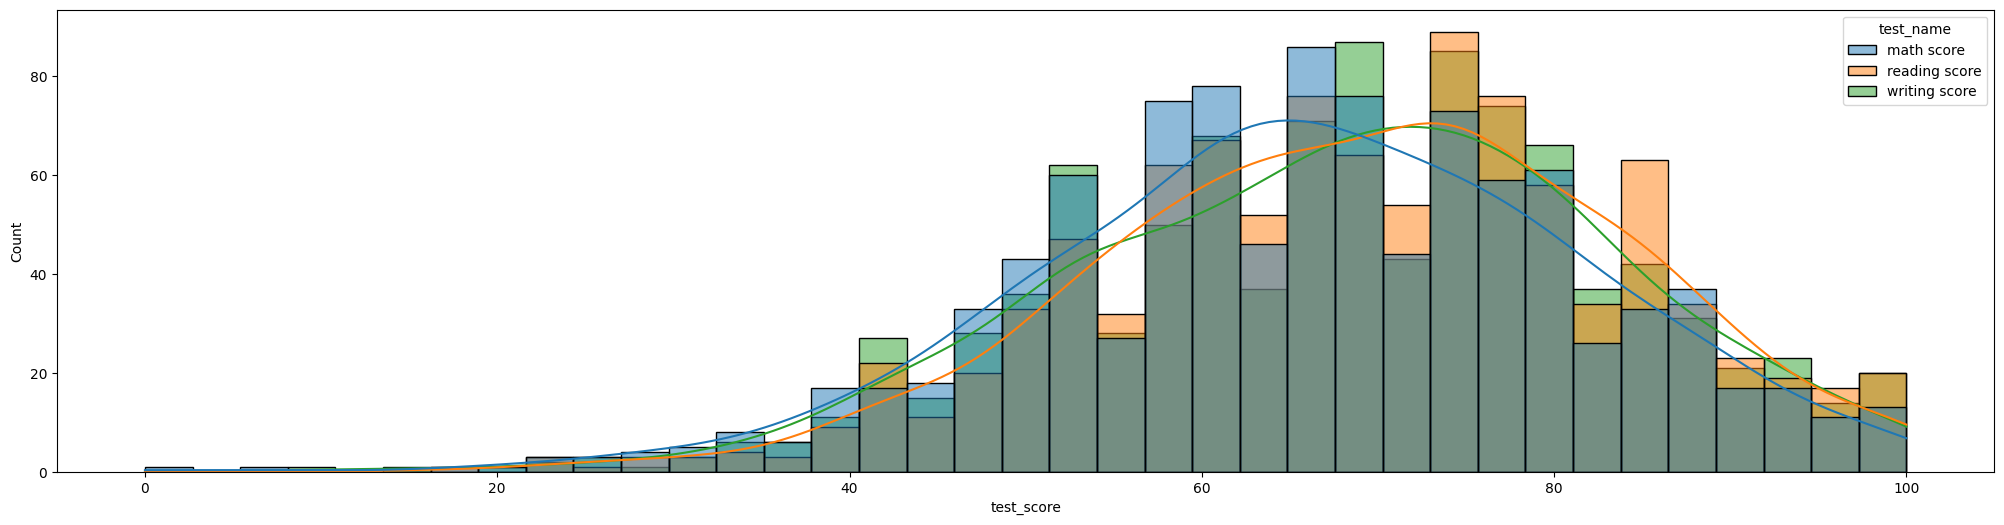

In [222]:
plt.subplots(1,1,figsize=(25,6))
sns.histplot(data=long_df, x= 'test_score', kde=True,hue='test_name')
plt.show()

In [246]:
long_df[['test_name', 'test_score']].groupby('test_name').mean()

,test_score
test_name,
math score,66.089
reading score,69.169
writing score,68.054


Scores across all tests are very close. However, it's worth noting that Maths scores among the students are overall lower than the other subjects.

## 7. Conclusion

Cleaning: 
- Data Required no/minimal cleaning; No nulls or duplicates, and outlierts are left as they are.
- Data types are correct.

EDA:
- Females outperformed males in test scores.
- E and D ethnic groups have the highest test scores, and group A has the lowest with median difference ~ 11.
- Students with average scores less than 30 are only seen in parents with level of education from some college to less (high school, some high school). 
- Students with parental level of master's degree tend to have higher average scores than the other levels.
- Females number with parental level of education above some college are greater than the number of males and this may explain why females has higher average scores than males given this correlation. 
- Students with standard lunch have higher scores than students with free/reduced lunch.
- Students who completed test preparation course got higher average score.
- Given the fact that the number of students who took a test preparation course is half the number of students that didn't took the course, we can conclude that students that took the preparation course were more likely to get higher scores than who didn't.
- Scores across all tests are very close. However, it's worth noting that Maths scores among the students are overall lower than the other subjects.